In [1526]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1527]:
df = pd.read_csv("Housing.csv")
df[["area", "bathrooms", "bedrooms"]].head()

,area,bathrooms,bedrooms
0,7420,2,4
1,8960,4,4
2,9960,2,3
3,7500,2,4
4,7420,1,4


- напишіть функцію **гіпотези лінійної регресії** у векторному вигляді:

In [1528]:
def h(X, w):
    return np.dot(X, w)

- створіть функцію для обчислення **функції втрат** у векторному вигляді:

In [1529]:
def mse(X, y, w):
    m = len(y)
    y_pred = h(X, w)
    loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return loss

- реалізуйте один **крок градієнтного спуску**:

In [1530]:
def grad_step(X, y, w, learning_rate=0.01):
    m = len(y)
    y_pred = h(X, w)
    errors = y_pred - y
    gradient = (1 / m) * X.T.dot(errors)
    w = w - learning_rate * gradient
    return w

- знайдіть **найкращі параметри $\vec{𝑤}$** для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень:

In [1531]:
def grad_descent(weights, X, y, num_iter, learning_rate=0.1, epsilon=0.00000000001):
    w = weights
    
    loss = mse(X, y, w)
    loss_history = [loss]    


    for i in range(num_iter):

        w = grad_step(X, y, w, learning_rate=learning_rate)                      
        loss = mse(X, y, w)
        if (i+1) % 10 == 0:
            print(f"Iteration {i+1}: Loss {loss}, Weights: {w}")

        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break
        loss_history.append(loss)        

    return w, loss_history

In [1532]:
# data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[["price", "area", "bathrooms", "bedrooms"]]), columns = ["price", "area", "bathrooms", "bedrooms"])
scaled_df["intercept"] = 1

features = scaled_df[["intercept", "area", "bathrooms", "bedrooms"]]
price = scaled_df["price"]

scaled_df.head()

,price,area,bathrooms,bedrooms,intercept
0,4.566365,1.046726,1.421812,1.403419,1
1,4.004484,1.757010,5.405809,1.403419,1
2,4.004484,2.218232,1.421812,0.047278,1
3,3.985755,1.083624,1.421812,1.403419,1
4,3.554979,1.046726,-0.570187,1.403419,1


In [1533]:
# model training
w, history = grad_descent((0, 0, 0, 0), features.values, price.values, 90, learning_rate=0.05)
print(f"Best w values: {w}")


Iteration 10: Loss 0.31427360799126297, Weights: [1.010404808e-16 2.026157883e-01 1.883894512e-01 1.246248664e-01]
Iteration 20: Loss 0.27141887314132207, Weights: [1.673686673e-16 3.086925352e-01 2.775386199e-01 1.701407958e-01]
Iteration 30: Loss 0.26082306099507657, Weights: [2.258743651e-16 3.656135007e-01 3.207087936e-01 1.830247315e-01]
Iteration 40: Loss 0.257917277039969, Weights: [2.509104036e-16 3.969178165e-01 3.423619229e-01 1.834342042e-01]
Iteration 50: Loss 0.2570101518045646, Weights: [2.781465170e-16 4.145389056e-01 3.537696024e-01 1.798254433e-01]
Iteration 60: Loss 0.2566874924956461, Weights: [2.868449616e-16 4.246665581e-01 3.601602020e-01 1.755403676e-01]
Iteration 70: Loss 0.2565597563012645, Weights: [3.034677504e-16 4.305913952e-01 3.639890458e-01 1.717466347e-01]
Iteration 80: Loss 0.2565051920081913, Weights: [3.025103104e-16 4.341073653e-01 3.664339963e-01 1.687308358e-01]
Iteration 90: Loss 0.2564806643236469, Weights: [3.027140210e-16 4.362166339e-01 3.680

In [1534]:
# check model training (донавчання)
w, ext_history = grad_descent(w, features.values, price.values, 90, learning_rate=0.0000000001)
print(f"Best w values after extra training: {w}")

Best w values after extra training: [3.027140210e-16 4.362166339e-01 3.680796128e-01 1.664541890e-01]


In [1535]:
# build loss history graph
def plot_loss_history(loss_history):
    plt.plot(loss_history)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss History")
    plt.show()

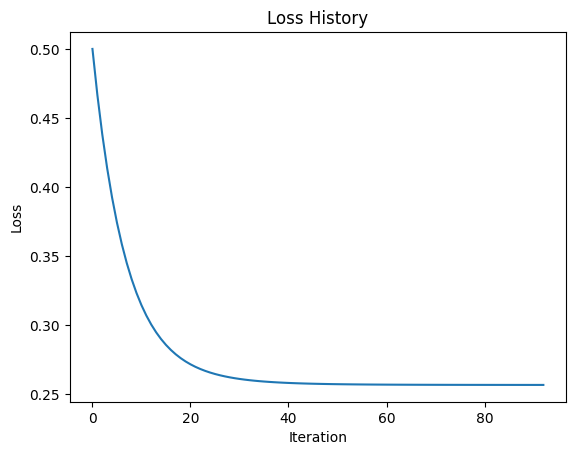

In [1536]:
plot_loss_history(history+ext_history)

- знайдіть ці ж параметри за допомогою **аналітичного рішення** :

In [1537]:
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [1538]:
w_ne = normal_equation(features.values, price.values)
print(f"Best w values after normal equation: {w_ne}")

Best w values after normal equation: [9.613685408e-16 4.394520852e-01 3.723444228e-01 1.605286598e-01]


- ці ж параметри за допомогою **sklearn** :

In [1539]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = scaled_df[["area", "bathrooms", "bedrooms"]].values
y = price.values

regressor = LinearRegression().fit(X, y)

w_skl = [regressor.intercept_] + list(regressor.coef_)

print(f"Best w values via sklearn library: {w_skl}")

Best w values via sklearn library: [3.163612015992004e-16, 0.43945208520646806, 0.37234442275273194, 0.1605286597689974]


- порівняйте отримані результати:

In [1540]:
print("\tПараметри моделі лінійної регресії, які були знайдені трьома різними методами:")
print(f"{w} - (градієнтний спуск)")
print(f"{w_ne} - (аналітичне рішення)")
print(f"{w_skl} - (sklearn бібліотека)")

conclusion = """\tМожемо зробити наступні висновки:
    - Параметри вектора 'w' - це ваги, які модель присвоює кожній фічі (площа, кількість ванних кімнат та кількість спалень) при прогнозуванні ціни. 
    - Чим більше вага, тим більший вплив має відповідна фіча на прогнозовану ціну.
    1-й елем. це intercept. Це наше базове значення ціни будинку, коли всі інші фічі дорівнюють нулю.
    2-й елем. це вага, присвоєна площі будинку. Тобто з кожним збільшенням площі на 1, прогнозована ціна 
збільшується приблизно на 0.436 (для град. спуску) або на 0.439 (для аналіт. та sklearn рішення)
    3-й та 4-й ел-ти це ваги, присвоєні кількості ванних кімнат та кількості спалень. З кожним збільшенням кожної з цих фічей 
ціна буде збільшуватися відповідно на значення парамерту
    - Хоча всі три методи дають трохи різні результати, вони є досить близькими.
Це свідчить про те, що усі вони ефективно знаходять оптимальні параметри для цієї моделі лінійної регресії.
Різниця у результатах пов’язана з різницею в методах оптимізації та в точності числових обчислень."""

print(conclusion)


	Параметри моделі лінійної регресії, які були знайдені трьома різними методами:
[3.027140210e-16 4.362166339e-01 3.680796128e-01 1.664541890e-01] - (градієнтний спуск)
[9.613685408e-16 4.394520852e-01 3.723444228e-01 1.605286598e-01] - (аналітичне рішення)
[3.163612015992004e-16, 0.43945208520646806, 0.37234442275273194, 0.1605286597689974] - (sklearn бібліотека)
	Можемо зробити наступні висновки:
    - Параметри вектора 'w' - це ваги, які модель присвоює кожній фічі (площа, кількість ванних кімнат та кількість спалень) при прогнозуванні ціни. 
    - Чим більше вага, тим більший вплив має відповідна фіча на прогнозовану ціну.
    1-й елем. це intercept. Це наше базове значення ціни будинку, коли всі інші фічі дорівнюють нулю.
    2-й елем. це вага, присвоєна площі будинку. Тобто з кожним збільшенням площі на 1, прогнозована ціна 
збільшується приблизно на 0.436 (для град. спуску) або на 0.439 (для аналіт. та sklearn рішення)
    3-й та 4-й ел-ти це ваги, присвоєні кількості ванних кімн